# Pandas for high-performance tables

- Pandas is the high-powered Python library used for data analysis. 
  - It is built on top of NumPy and is capable of handling large datasets efficiently. 
  - Pandas is also used for data visualization as it can plot data in a tabular or graphical form. 
- It will be the basis of GeoPandas, which we will use to look at vector data
  - For now, we will start with an ordinary table of data.


In [ ]:
# Do our imports
import pandas
import os

# Set our file paths (YOU SHOULD HAVE DOWNLOADED THIS FROM GOOGLE DRIVE!)
data_directory = '../../base_data'
food_prices_filename = 'world_monthly_food_prices.csv'
food_prices_path = os.path.join(data_directory, food_prices_filename)

# Pandas provides a read_csv function that will read a CSV file into a dataframe
food_prices = pandas.read_csv(food_prices_path)

# Print the dataframe using default printing options
print(food_prices)

                                     Domain Code                  Domain  \
0                                             CP  Consumer Price Indices   
1                                             CP  Consumer Price Indices   
2                                             CP  Consumer Price Indices   
3                                             CP  Consumer Price Indices   
4                                             CP  Consumer Price Indices   
..                                           ...                     ...   
176                                           CP  Consumer Price Indices   
177                                           CP  Consumer Price Indices   
178                                           CP  Consumer Price Indices   
179                                           CP  Consumer Price Indices   
180  FAOSTAT Date: Wed Aug 17 16:12:56 CEST 2016                     NaN   

     AreaCode AreaName  ElementCode ElementName  ItemCode  \
0      5000.0    World    

### Printing the dataframe head()

- It's a little hard to take in all the data because it skips rows and columns to make it fit
- An alternate way to view it is to use the `head()` method to see the first few rows of the table

In [ ]:
# Print the head of the dataframe. Reminder, the . operator is used to 
# access a function (technically called method) of an object. 
# Before I print it, I'm also going to change the default print settings to be wider

# Set the display width to 1000
pandas.set_option('display.width', 1000)

# Print it with the new settings
print(food_prices.head())

  Domain Code                  Domain  AreaCode AreaName  ElementCode ElementName  ItemCode                                    ItemName    Year  Value  Flag          FlagD
0          CP  Consumer Price Indices    5000.0    World       7001.0     January   23013.0  Consumer Prices, Food Indices (2000 = 100)  2000.0   99.5   NaN  Official data
1          CP  Consumer Price Indices    5000.0    World       7001.0     January   23013.0  Consumer Prices, Food Indices (2000 = 100)  2001.0  101.5   NaN  Official data
2          CP  Consumer Price Indices    5000.0    World       7001.0     January   23013.0  Consumer Prices, Food Indices (2000 = 100)  2002.0  106.5   NaN  Official data
3          CP  Consumer Price Indices    5000.0    World       7001.0     January   23013.0  Consumer Prices, Food Indices (2000 = 100)  2003.0  112.5   NaN  Official data
4          CP  Consumer Price Indices    5000.0    World       7001.0     January   23013.0  Consumer Prices, Food Indices (2000 = 100)  200

### Explore the different object attributes of the dataframe

- For instance look at the column names

In [ ]:
print('List of column names:', food_prices.columns)

List of column names: Index(['Domain Code', 'Domain', 'AreaCode', 'AreaName', 'ElementCode', 'ElementName', 'ItemCode', 'ItemName', 'Year', 'Value', 'Flag', 'FlagD'], dtype='object')


### Get a specific column
- To get a column, use square braces with the name of the column.

In [ ]:
food_prices_value_column = food_prices['Value']

print('Specific column:', food_prices_value_column)

Specific column: 0       99.5
1      101.5
2      106.5
3      112.5
4      119.2
       ...  
176    210.3
177    224.2
178    239.0
179    250.9
180      NaN
Name: Value, Length: 181, dtype: float64


In [ ]:
print('Specific value in that column:', food_prices_value_column[6])

Specific value in that column: 132.2


### Iterate through columns

- The `food_prices.columns` attribute can be made into a list for iteration
- Other (better as we will eventually see) ways to iterate through columns are possible
  - Such as itertools
- For now, iterate through the columns and sum them up.

In [ ]:
# The columns attribute is not quite a list. It's a panda's Series and has information about what it indexes
print(food_prices.columns)

Index(['Domain Code', 'Domain', 'AreaCode', 'AreaName', 'ElementCode', 'ElementName', 'ItemCode', 'ItemName', 'Year', 'Value', 'Flag', 'FlagD'], dtype='object')


In [ ]:
# But we can make it into an ordinary list
columns_list = list(food_prices.columns)
print('columns_list', columns_list)

columns_list ['Domain Code', 'Domain', 'AreaCode', 'AreaName', 'ElementCode', 'ElementName', 'ItemCode', 'ItemName', 'Year', 'Value', 'Flag', 'FlagD']


In [ ]:
# Iterate through the columns and print the sum
for column_name in columns_list:
    print('Currently accessing column', column_name)
    
    current_column = food_prices[column_name]
    
    # Check the datatype of the current_column
    current_data_type = current_column.dtype
    print('Datatype of current_column:', current_data_type)
    
    if current_data_type == 'float64':
        print('    Sum of column', column_name, 'is', current_column.sum())

Currently accessing column Domain Code
Datatype of current_column: object
Currently accessing column Domain
Datatype of current_column: object
Currently accessing column AreaCode
Datatype of current_column: float64
    Sum of column AreaCode is 900000.0
Currently accessing column AreaName
Datatype of current_column: object
Currently accessing column ElementCode
Datatype of current_column: float64
    Sum of column ElementCode is 1261170.0
Currently accessing column ElementName
Datatype of current_column: object
Currently accessing column ItemCode
Datatype of current_column: float64
    Sum of column ItemCode is 4142340.0
Currently accessing column ItemName
Datatype of current_column: object
Currently accessing column Year
Datatype of current_column: float64
    Sum of column Year is 361260.0
Currently accessing column Value
Datatype of current_column: float64
    Sum of column Value is 28690.8
Currently accessing column Flag
Datatype of current_column: float64
    Sum of column Flag is

### Under the hood

- All parts of the pandas dataframe are represented via numpy arrays
  - If you want to access them as numpy arrays instead of Pandas dataframes or columns, you can use the .values attribute

In [ ]:
numpy_array = food_prices_value_column.values
print(numpy_array)

[ 99.5 101.5 106.5 112.5 119.2 125.  132.2 139.7 155.5 172.  184.2 199.9
 213.2 227.2 240.7 100.5 101.9 107.5 113.7 119.5 126.8 133.  141.2 159.4
 172.6 185.9 201.6 213.7 229.7 241.8  99.9 102.3 107.2 113.9 120.  126.9
 132.9 141.6 161.  173.  185.6 201.9 214.9 229.2 242.3  99.7 103.1 107.4
 114.2 120.9 127.3 133.5 141.9 163.  173.4 186.1 202.6 215.6 230.6 243.1
  99.7 103.5 107.7 114.2 121.4 127.4 134.2 142.4 164.3 174.  186.1 203.2
 215.9 230.6 243.8  99.3 103.2 107.6 113.7 121.6 127.  134.3 143.7 165.8
 174.3 186.4 204.2 216.  232.1 244.6  99.2 103.3 107.7 113.5 121.7 128.
 134.3 145.3 167.5 175.9 188.  205.7 217.3 234.  246.4  99.6 103.9 108.5
 113.9 122.8 128.4 135.2 147.4 168.6 177.5 189.9 207.1 219.5 236.2 247.7
 100.1 104.4 109.4 114.9 123.9 129.  136.7 149.  169.7 178.8 192.1 208.5
 221.  237.4 249.1 100.2 105.  109.6 116.  124.5 129.8 137.6 150.4 170.1
 179.3 193.5 209.4 221.4 238.4 249.6 100.6 105.3 110.6 117.2 124.5 130.3
 138.5 151.5 169.8 180.4 195.3 209.6 222.1 239.4 249

### Default plotting

- By default, pandas has a plot function
  - Let's try it

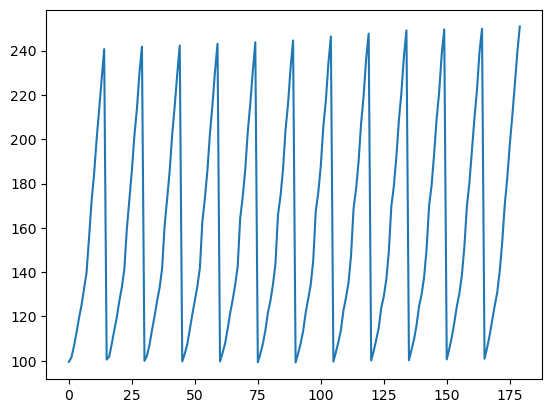

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(food_prices['Value'])
plt.show() 

### Discussion point

- Why is the data like this?

### Pandas Functionality

- Let's start by importing everything afresh and setting a random seed.
  - Setting the random seed means we will get the same random numbers each time we run the code.

In [ ]:
import os

import numpy as np
import pandas as pd

# Set a seed value for the random generator
np.random.seed(48151623)

### Create an individual column

- In pandas, they are called Series
- One very important thing to note is that in the output, we see TWO columns
  - Pandas always includes an index for every Series or Dataframe 
  - The index is the leftmost column, and is used to identify each row

In [ ]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


### There are many built-in ways of generating series

- For instance, you can automatically generate a series of dates

In [ ]:
# Pandas is very detailed in dealing with dates and all the quirks (leap year?) that this leads to.
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06'], dtype='datetime64[ns]', freq='D')


### Making new dataframes

- Dataframes can be made from a a dictionary of series, or from a list of lists, or from a numpy array, or several other possiblities.
  - We'll explore a few here
  - The primary way is to call the pd.DataFrame() class with specific arguments
    - Returns a new dataframe object here named `df`

In [ ]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
df_rand = pd.DataFrame(np.random.randn(6, 4), columns=['A', 'B', 'C', 'D'])
print('df:\n', df_rand)

df:
           A         B         C         D
0 -0.173670 -0.245628  1.682088 -0.936641
1 -0.049496  0.090495  0.415982 -1.493572
2  1.248021 -1.469133  1.553773  1.369847
3  0.299491 -0.621347  0.930147  2.286102
4  1.874494 -1.212823 -0.877934  0.197015
5 -0.115918 -0.378941  0.504888 -0.018819


In [ ]:
# A mre complex example
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
print(df2.head())

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [ ]:
# In addition to printing the head, there is also a handy .describe() method
# this gives descriptive statistics.
df2.describe()

,A,B,C,D
count,4.0,4,4.0,4.0
mean,1.0,2013-01-02 00:00:00,1.0,3.0
min,1.0,2013-01-02 00:00:00,1.0,3.0
25%,1.0,2013-01-02 00:00:00,1.0,3.0
50%,1.0,2013-01-02 00:00:00,1.0,3.0
75%,1.0,2013-01-02 00:00:00,1.0,3.0
max,1.0,2013-01-02 00:00:00,1.0,3.0
std,0.0,NaN,0.0,0.0


### It's numpy matrices all the way down

- Dataframes add extra information to make it feel like a table or spreadsheet that we're used to

In [ ]:
# Another way you can get back to the the raw array is to_numpy()
# (though this might lose a lot of functionality).
a = df_rand.to_numpy()
print('a\n', a)

a
 [[-0.17367009 -0.24562811  1.68208757 -0.93664127]
 [-0.04949571  0.09049485  0.41598207 -1.4935717 ]
 [ 1.24802097 -1.46913304  1.55377349  1.36984696]
 [ 0.29949133 -0.62134685  0.9301465   2.28610199]
 [ 1.87449394 -1.21282308 -0.87793409  0.19701502]
 [-0.11591839 -0.37894133  0.50488834 -0.01881946]]


### Operations on dataframes: sorting

- Here we are going to use the fast sorting algorithm provided by Pandas
  - It's called `sort_values()`
  - I want to illustrate the most common mistake people make with Pandas and discuss it.

In [ ]:
# We're going to sort by B. But let's print out the B column first.
print('B column:\n', df_rand['B'])

# Now let's call the sort_values method on the dataframe.
df_rand.sort_values(by='B')

# Print it out to compare
print('Sorted:\n', df_rand['B'])

B column:
 0   -0.245628
1    0.090495
2   -1.469133
3   -0.621347
4   -1.212823
5   -0.378941
Name: B, dtype: float64
Sorted:
 0   -0.245628
1    0.090495
2   -1.469133
3   -0.621347
4   -1.212823
5   -0.378941
Name: B, dtype: float64


### Why did it not chamge?

- The reason is that `sort_values()` returns a new dataframe, but we didn't assign it to anything.
  - We can assign it to a new dataframe, or we can use the `inplace=True` argument to change the dataframe in place.

In [ ]:
# Easy way to get around this is just to assign the returned dataframe to a variable (even the input variable)
df_rand = df_rand.sort_values(by='B')
print('Sorted with return:\n', df_rand)

# Alternatively, if you hate returning things, there is the inplace=True command, which will modify the df ... inplace.
df_rand.sort_values(by='B', inplace=True)
print('Sorted inplace:\n', df_rand)

Sorted with return:
           A         B         C         D
2  1.248021 -1.469133  1.553773  1.369847
4  1.874494 -1.212823 -0.877934  0.197015
3  0.299491 -0.621347  0.930147  2.286102
5 -0.115918 -0.378941  0.504888 -0.018819
0 -0.173670 -0.245628  1.682088 -0.936641
1 -0.049496  0.090495  0.415982 -1.493572
Sorted inplace:
           A         B         C         D
2  1.248021 -1.469133  1.553773  1.369847
4  1.874494 -1.212823 -0.877934  0.197015
3  0.299491 -0.621347  0.930147  2.286102
5 -0.115918 -0.378941  0.504888 -0.018819
0 -0.173670 -0.245628  1.682088 -0.936641
1 -0.049496  0.090495  0.415982 -1.493572


### Slicing and Dicing

- We can slice and dice dataframes in many ways
- - We can use the `[]` operator
  - We can use the `loc` and `iloc` methods
    - loc is for accessing via labels/indices on the data
    - iloc is for accessing by position of the data


In [ ]:
# Slicing with the [] works like numpy

# Starts with rows
print(df_rand[0:3])

          A         B         C         D
2  1.248021 -1.469133  1.553773  1.369847
4  1.874494 -1.212823 -0.877934  0.197015
3  0.299491 -0.621347  0.930147  2.286102


In [ ]:
# You can get unintuitive results using the standard 
# Python / Numpy expressions for selecting and setting are intuitiveits best to use
# the optimized pandas data access methods, .at, .iat, .loc and .iloc.

## Selecting by LABELS, loc and iloc

r = df_rand.loc[0] # 0-th row.
print(r)

A   -0.173670
B   -0.245628
C    1.682088
D   -0.936641
Name: 0, dtype: float64


In [ ]:
# Discuss difference between df['A'] and df.loc[0]
r = df_rand.loc[0, 'A']
print(r)

-0.1736700891063406


In [ ]:
r = df_rand.loc[:, 'A'] # Colon is a slice, an empty colon means ALL the values.
print(r)

2    1.248021
4    1.874494
3    0.299491
5   -0.115918
0   -0.173670
1   -0.049496
Name: A, dtype: float64


In [ ]:
# SELECTING BY POSITION
r = df_rand.iloc[3]
print(r)

A   -0.115918
B   -0.378941
C    0.504888
D   -0.018819
Name: 5, dtype: float64


In [ ]:
# Selecting with slices
r = df_rand.iloc[3:5, 0:2]
print(r)

          A         B
5 -0.115918 -0.378941
0 -0.173670 -0.245628


In [ ]:
# Slices again with an empty slice.
r = df_rand.iloc[1:3, :]
print(r)

          A         B         C         D
4  1.874494 -1.212823 -0.877934  0.197015
3  0.299491 -0.621347  0.930147  2.286102


In [ ]:
r = df_rand.iloc[:, 1:3]
print(r)

          B         C
2 -1.469133  1.553773
4 -1.212823 -0.877934
3 -0.621347  0.930147
5 -0.378941  0.504888
0 -0.245628  1.682088
1  0.090495  0.415982


In [ ]:
# Boolean indexing
# Using a single column’s values to select data.
r = df_rand[df_rand['A'] > 0]
print(r)

          A         B         C         D
2  1.248021 -1.469133  1.553773  1.369847
4  1.874494 -1.212823 -0.877934  0.197015
3  0.299491 -0.621347  0.930147  2.286102


In [ ]:
# Make a copy (why?) and add a column
df_copy = df_rand.copy()
df_copy['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
r = df_copy[df_copy['E'].isin(['two', 'four'])]
print(r)

          A         B         C         D     E
3  0.299491 -0.621347  0.930147  2.286102   two
0 -0.173670 -0.245628  1.682088 -0.936641  four


In [ ]:
# Setting by assigning with a NumPy array:
df = df_rand.copy()
df.loc[:, 'D'] = np.array([5] * len(df))

### Merging and Joining

- Merging data is one of the most time-intensive and important data-cleaning skills
  - Lets you create "new" data by merging other old data!


In [ ]:
# Join
# SQL style merges. See the Database style joining section.

left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

print(left)
print(right)

df = pd.merge(left, right, on='key')
print('df:\n', df)

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5
df:
    key  lval  rval
0  foo     1     4
1  bar     2     5


<Axes: >

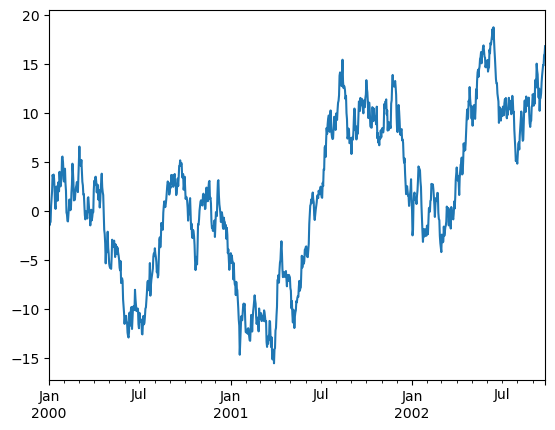

In [ ]:
# Stacking
stacked = df.stack()
# print('stacked:\n', stacked)


# Pivot Tables
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

# print(df) # SPREADSHEET VIEW
df = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
# print(df) # Multiindexed (Pivot table) view.

# NOTICE that a pivot table is just the above date but where specific things have been made into multi-level
# indices.

# PLOTTING
ts = pd.Series(np.random.randn(1000),
            index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
ts.plot()

In [ ]:
# Writing to files

df.to_csv('foo.csv')